In [ ]:
import os

def get_file_size_mb(path):
    size_bytes = os.path.getsize(path)
    size_mb = size_bytes / (1024 * 1024)
    return round(size_mb, 2)

# === File Paths ===
before_path = "/content/yolo12n_pruned_ultra.onnx"             # Full pruned PyTorch model before ONNX conversion
after_path = "/content/yolo12n_pruned_quantized_2.onnx"     # Quantized ONNX model after compression

# === Print Sizes ===
before_size = get_file_size_mb(before_path)
after_size = get_file_size_mb(after_path)
reduction = before_size - after_size
percent = (reduction / before_size) * 100 if before_size > 0 else 0

print("📦 Model Size Comparison:")
print(f"🧠 Before Compression: {before_size:.2f} MB")
print(f"⚡ After Compression : {after_size:.2f} MB")
print(f"🔻 Reduction         : {reduction:.2f} MB ({percent:.2f}% smaller)")

📦 Model Size Comparison:
🧠 Before Compression: 6.00 MB
⚡ After Compression : 2.97 MB
🔻 Reduction         : 3.03 MB (50.50% smaller)


In [ ]:
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 107.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 10.1 MB/s eta 0:00:00


In [ ]:
!pip install onnx onnxruntime-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.2/283.2 MB 4.4 MB/s eta 0:00:00


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 118.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 98.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 39.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
from ultralytics import YOLO

# Load your trained .pt model
model = YOLO("/content/yolo12n_pruned_ultra.pt")  # or "yolov8n.pt" or your actual file

# Print model architecture summary
print(model.model)

# OR: Inspect the final detection layer to see num_classes
num_classes = model.model.nc
print(f"✅ Number of classes in this model: {num_classes}")


DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C3k2(
      (cv1): Conv(
        (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(48, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
   

In [ ]:
######## Final quantized model##########

In [ ]:
from ultralytics import YOLO

model = YOLO('/content/yolo12n_pruned_ultra.pt')
model.export(format='onnx')  # → yolov8n.onnx

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel CPUs. Learn more at https://docs.ultralytics.com/integrations/openvino/
YOLOv12n summary (fused): 159 layers, 2,583,739 parameters, 0 gradients, 6.5 GFLOPs

PyTorch: starting from '/content/yolo12n_pruned_ultra.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 79, 8400) (5.3 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<1.18.0', 'onnxslim>=0.1.53'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 2.4s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


'/content/yolo12n_pruned_ultra.onnx'

In [ ]:
!python -m onnxruntime.quantization.preprocess --input yolo12n_pruned_ultra.onnx --output preprocessed.onnx

In [ ]:
from onnxruntime.quantization import quantize_dynamic, QuantType

model_fp32 = 'preprocessed.onnx'
model_int8 = 'dynamic_quantized.onnx'

quantize_dynamic(
    model_input=model_fp32,
    model_output=model_int8,
    weight_type=QuantType.QUInt8  # or QuantType.QInt8
)

print("✅ Dynamic quantization complete. Saved as:", model_int8)

✅ Dynamic quantization complete. Saved as: dynamic_quantized.onnx


In [ ]:
import os

def get_file_size_mb(path):
    size_bytes = os.path.getsize(path)
    size_mb = size_bytes / (1024 * 1024)
    return round(size_mb, 2)

# === File Paths ===
before_path = "/content/yolo12n_pruned_ultra.onnx"             # Full pruned PyTorch model before ONNX conversion
after_path = "/content/dynamic_quantized.onnx"     # Quantized ONNX model after compression

# === Print Sizes ===
before_size = get_file_size_mb(before_path)
after_size = get_file_size_mb(after_path)
reduction = before_size - after_size
percent = (reduction / before_size) * 100 if before_size > 0 else 0

print("📦 Model Size Comparison:")
print(f"🧠 Before Compression: {before_size:.2f} MB")
print(f"⚡ After Compression : {after_size:.2f} MB")
print(f"🔻 Reduction         : {reduction:.2f} MB ({percent:.2f}% smaller)")

📦 Model Size Comparison:
🧠 Before Compression: 10.15 MB
⚡ After Compression : 2.98 MB
🔻 Reduction         : 7.17 MB (70.64% smaller)


In [ ]:
# Step 1: Install gdown
!pip install -q gdown

# Step 2: Download the ZIP file from your Google Drive link
!gdown --id 1GsnkaeJkd7Fx3mwuVcN3vhvLscbVW3rg -O Main.zip

# Step 3: Unzip into /content/dataset
!unzip -q Main.zip -d /content/dataset

# Step 4: List extracted folders to verify
!ls /content/dataset

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1GsnkaeJkd7Fx3mwuVcN3vhvLscbVW3rg
From (redirected): https://drive.google.com/uc?id=1GsnkaeJkd7Fx3mwuVcN3vhvLscbVW3rg&confirm=t&uuid=978fe28c-030d-4a2a-8567-7ac38379ab9e
To: /content/Main.zip
100% 5.10G/5.10G [01:10<00:00, 71.9MB/s]
Main


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

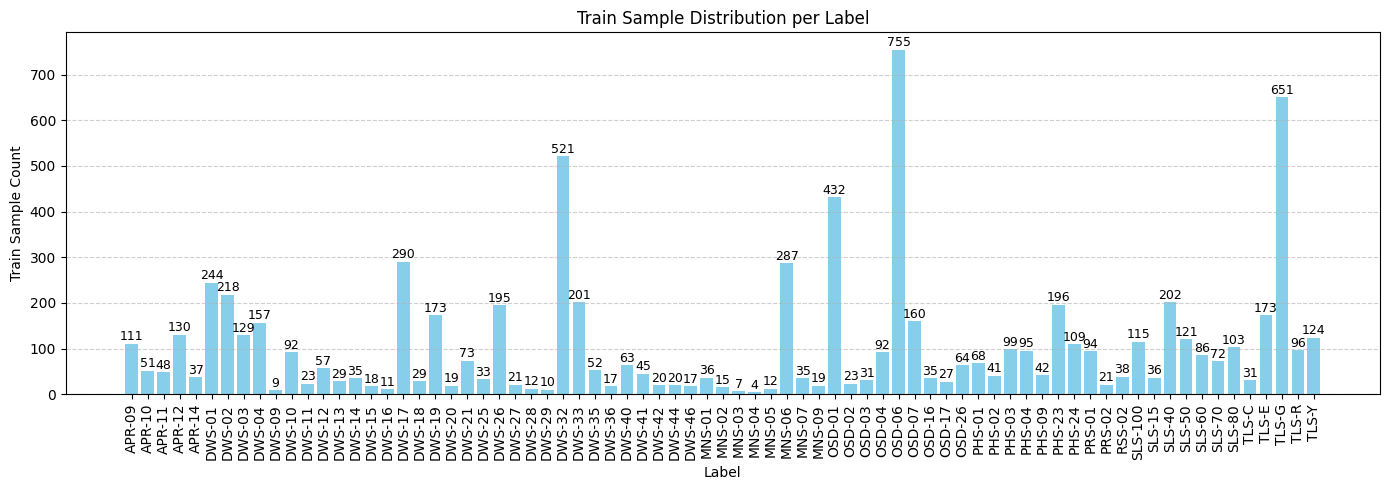

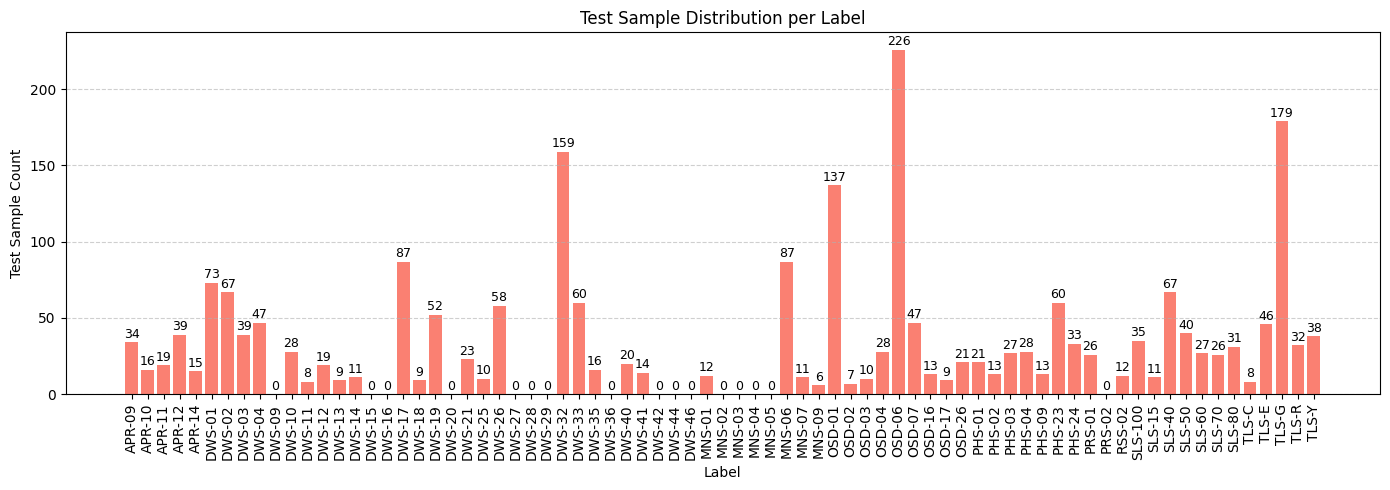

In [ ]:
# Load and clean the data
df = pd.read_csv('/content/dataset/Main/label_frequencies.xlsx - Label Frequencies.csv')
df = df.drop(columns=['Total'])
df = df[df['Label'].str.lower() != 'total']

# --- Plot Train Distribution ---
plt.figure(figsize=(14, 5))
bars = plt.bar(df['Label'], df['Train'], color='skyblue')
plt.title('Train Sample Distribution per Label')
plt.xlabel('Label')
plt.ylabel('Train Sample Count')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add value labels on top
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, str(height), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# --- Plot Test Distribution ---
plt.figure(figsize=(14, 5))
bars = plt.bar(df['Label'], df['Test'], color='salmon')
plt.title('Test Sample Distribution per Label')
plt.xlabel('Label')
plt.ylabel('Test Sample Count')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add value labels on top
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, str(height), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
import os
import shutil
import xml.etree.ElementTree as ET
import pandas as pd

# Define base dataset directory
base_dir = './dataset/Main'

# Create destination structure
splits = ['train', 'val', 'test']
for split in splits:
    os.makedirs(f'./final_dataset/{split}/images', exist_ok=True)
    os.makedirs(f'./final_dataset/{split}/labels', exist_ok=True)

# Read class labels from Excel
df = pd.read_csv('/content/dataset/Main/label_frequencies.xlsx - Label Frequencies.csv')
df = df.drop(columns=['Total'], errors='ignore')
df = df[df['Label'].str.lower() != 'total']
class_list = df['Label'].tolist()

# XML to YOLO format conversion
def convert_and_move(source_dir, img_files, target_split):
    for file in img_files:
        img_path = os.path.join(source_dir, file)
        xml_path = os.path.join(source_dir, file.replace('.jpg', '.xml'))

        if not os.path.exists(xml_path):
            continue

        # Copy image
        shutil.copy(img_path, f'./final_dataset/{target_split}/images/{file}')

        # Convert XML to YOLO
        tree = ET.parse(xml_path)
        root = tree.getroot()
        width = int(root.find("size/width").text)
        height = int(root.find("size/height").text)

        with open(f'./final_dataset/{target_split}/labels/{file.replace(".jpg", ".txt")}', "w") as f:
            for obj in root.findall("object"):
                class_name = obj.find("name").text
                if class_name not in class_list:
                    continue
                class_id = class_list.index(class_name)

                bbox = obj.find("bndbox")
                xmin = int(bbox.find("xmin").text)
                ymin = int(bbox.find("ymin").text)
                xmax = int(bbox.find("xmax").text)
                ymax = int(bbox.find("ymax").text)

                cx = ((xmin + xmax) / 2) / width
                cy = ((ymin + ymax) / 2) / height
                w = (xmax - xmin) / width
                h = (ymax - ymin) / height

                f.write(f"{class_id} {cx:.6f} {cy:.6f} {w:.6f} {h:.6f}\n")

# Process train set
train_dir = os.path.join(base_dir, 'train')
train_images = [f for f in os.listdir(train_dir) if f.endswith('.jpg')]
convert_and_move(train_dir, train_images, 'train')

# Split test into test and val (50/50)
test_dir = os.path.join(base_dir, 'test')
test_images = [f for f in os.listdir(test_dir) if f.endswith('.jpg')]
mid = len(test_images) // 2
val_images = test_images[:mid]
test_images = test_images[mid:]

convert_and_move(test_dir, val_images, 'val')
convert_and_move(test_dir, test_images, 'test')

In [ ]:
!pip install opencv-python numpy tqdm

In [ ]:
!pip install --upgrade ultralytics onnxruntime opencv-python matplotlib tqdm numpy pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 109.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 92.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 112.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the sou

In [ ]:
import ultralytics
print("Ultralytics version:", ultralytics.__version__)

Ultralytics version: 8.3.145


In [ ]:
from ultralytics import YOLO

# Load trained model
model = YOLO('/content/dynamic_quantized.onnx')

# Evaluate the model's performance on the test set
metrics = model.val(data='/content/data.yaml')
print(metrics.box.map)  # Print mAP50-95
print(metrics.box.map50)  # Print mAP50
print(metrics.box.map75)  # Print mAP75

WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
Loading /content/dynamic_quantized.onnx for ONNX Runtime inference...
Using ONNX Runtime CPUExecutionProvider
Setting batch=1 input of shape (1, 3, 640, 640)


100%|██████████| 755k/755k [00:00<00:00, 24.3MB/s]

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3517.3±1388.3 MB/s, size: 631.9 KB)



val: Scanning /content/final_dataset/val/labels... 920 images, 0 backgrounds, 0 corrupt: 100%|██████████| 920/920 [00:00<00:00, 2456.96it/s]

val: New cache created: /content/final_dataset/val/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 920/920 [03:28<00:00,  4.41it/s]


                   all        920       1155      0.819      0.708      0.784      0.621
                APR-09         15         15       0.78      0.733      0.734      0.547
                APR-10          7          7          1      0.819      0.978      0.806
                APR-11         13         13          1       0.98      0.995      0.707
                APR-12         21         21       0.94      0.714      0.796      0.628
                APR-14          8          8       0.82      0.875      0.853      0.666
                DWS-01         31         31      0.927      0.968      0.957      0.864
                DWS-02         34         34      0.957      0.941      0.985       0.89
                DWS-03         24         24      0.923      0.992      0.992      0.904
                DWS-04         16         16      0.913      0.938      0.976      0.897
                DWS-10         11         11      0.855      0.909       0.95      0.776
                DWS-1

In [ ]:
# Get mean results
mp, mr, map50, map = metrics.box.mean_results()

print("📈 Precision (mean):", mp)
print("📈 Recall (mean):", mr)
print("📈 F1 Score (mean):", 2 * mp * mr / (mp + mr + 1e-6))  # Harmonic mean
print("📊 mAP@0.5:", map50)
print("📊 mAP@0.5:0.95:", map)


📈 Precision (mean): 0.8193038789609397
📈 Recall (mean): 0.7080848720245912
📈 F1 Score (mean): 0.7596445922319194
📊 mAP@0.5: 0.7838370750875737
📊 mAP@0.5:0.95: 0.6214557257314843


In [ ]:
!ls /content/runs/detect/val

confusion_matrix_normalized.png  PR_curve.png		val_batch1_labels.jpg
confusion_matrix.png		 R_curve.png		val_batch1_pred.jpg
F1_curve.png			 val_batch0_labels.jpg	val_batch2_labels.jpg
P_curve.png			 val_batch0_pred.jpg	val_batch2_pred.jpg


In [ ]:
# Display images one by one (not in a grid)
for img_file in [
    "confusion_matrix_normalized.png", "PR_curve.png", "val_batch1_labels.jpg",
    "confusion_matrix.png", "R_curve.png", "val_batch1_pred.jpg",
    "F1_curve.png", "val_batch0_labels.jpg", "val_batch2_labels.jpg",
    "P_curve.png", "val_batch0_pred.jpg", "val_batch2_pred.jpg"
]:
    img_path = f"runs/detect/val/{img_file}"
    if os.path.exists(img_path):
        img = mpimg.imread(img_path)
        plt.figure(figsize=(10, 6))
        plt.imshow(img)
        plt.title(img_file, fontsize=12)
        plt.axis("off")
        plt.show()
    else:
        print(f"❌ Image not found: {img_path}")


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from ultralytics import YOLO

# Load trained model
model_2 = YOLO('/content/yolo12n_pruned_ultra.pt')

# Evaluate the model's performance on the test set
metrics = model_2.val(data='/content/data.yaml')
print(metrics.box.map)  # Print mAP50-95
print(metrics.box.map50)  # Print mAP50
print(metrics.box.map75)  # Print mAP75

Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
YOLOv12n summary (fused): 159 layers, 2,583,739 parameters, 0 gradients, 6.5 GFLOPs
val: Fast image access ✅ (ping: 0.2±0.4 ms, read: 2004.8±1121.7 MB/s, size: 603.3 KB)


val: Scanning /content/final_dataset/val/labels.cache... 920 images, 0 backgrounds, 0 corrupt: 100%|██████████| 920/920 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [02:22<00:00,  2.46s/it]


                   all        920       1155      0.862      0.769      0.835      0.665
                APR-09         15         15      0.777      0.733       0.81      0.587
                APR-10          7          7          1      0.843      0.953      0.803
                APR-11         13         13      0.996          1      0.995      0.724
                APR-12         21         21      0.881       0.81      0.859      0.663
                APR-14          8          8      0.818      0.875      0.949      0.751
                DWS-01         31         31      0.883          1      0.972      0.892
                DWS-02         34         34       0.93      0.912      0.989       0.91
                DWS-03         24         24      0.981          1      0.995      0.913
                DWS-04         16         16      0.898          1      0.991      0.906
                DWS-10         11         11      0.913      0.951      0.988      0.787
                DWS-1

In [ ]:
# Get mean results
mp, mr, map50, map = metrics.box.mean_results()

print("📈 Precision (mean):", mp)
print("📈 Recall (mean):", mr)
print("📈 F1 Score (mean):", 2 * mp * mr / (mp + mr + 1e-6))  # Harmonic mean
print("📊 mAP@0.5:", map50)
print("📊 mAP@0.5:0.95:", map)

📈 Precision (mean): 0.8622556588493824
📈 Recall (mean): 0.7692482445156041
📈 F1 Score (mean): 0.8131004087398047
📊 mAP@0.5: 0.8353076052383015
📊 mAP@0.5:0.95: 0.6650031578136438


In [ ]:
# Display images one by one (not in a grid)
for img_file in [
    "confusion_matrix_normalized.png", "PR_curve.png", "val_batch1_labels.jpg",
    "confusion_matrix.png", "R_curve.png", "val_batch1_pred.jpg",
    "F1_curve.png", "val_batch0_labels.jpg", "val_batch2_labels.jpg",
    "P_curve.png", "val_batch0_pred.jpg", "val_batch2_pred.jpg"
]:
    img_path = f"runs/detect/val2/{img_file}"
    if os.path.exists(img_path):
        img = mpimg.imread(img_path)
        plt.figure(figsize=(10, 6))
        plt.imshow(img)
        plt.title(img_file, fontsize=12)
        plt.axis("off")
        plt.show()
    else:
        print(f"❌ Image not found: {img_path}")


Output hidden; open in https://colab.research.google.com to view.